In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os , shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# folder = '/content/drive/MyDrive/Vit/brain_tumor_dataset/yes/'
# count = 1
# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "Y_"+str(count)+".jpg"
#     os.rename(source , destination)
#     count = count+1
# print("All files renames in yes directordy")

All files renames in yes directordy


In [ ]:
# folder = '/content/drive/MyDrive/Vit/brain_tumor_dataset/no/'
# count = 1
# for filename in os.listdir(folder):
#     source = folder + filename
#     destination = folder + "N_"+str(count)+".jpg"
#     os.rename(source , destination)
#     count = count+1
# print("All files renames in no directordy")

All files renames in no directordy


In [12]:
#EDA

In [13]:
listyes = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/yes/')
number_list_yes = len(listyes)

listno = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/no/')
number_list_no = len(listno)

In [14]:
print(number_list_yes)
print(number_list_no )

155
98


In [15]:
#Plot
data = {'tumorous':number_list_yes , 'non-tumorous':number_list_no}

In [16]:
typex = data.keys()
values = data.values()

Text(0.5, 1.0, 'Count of Brain Tumour Images')

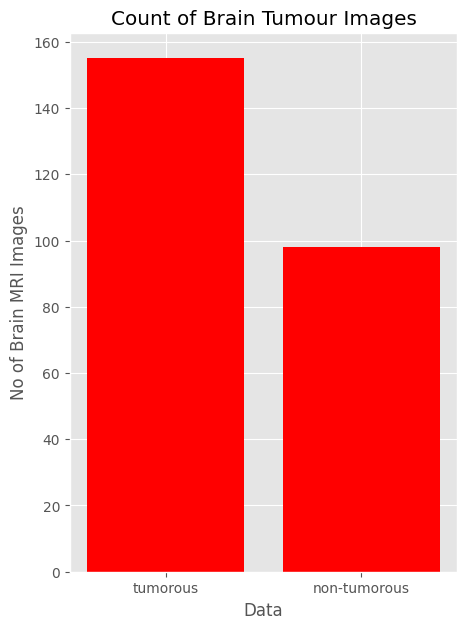

In [17]:
fig = plt.figure(figsize=(5,7))
plt.bar(typex , values , color = "red")
plt.xlabel("Data")
plt.ylabel("No of Brain MRI Images")
plt.title("Count of Brain Tumour Images")

In [18]:
#Found Data to be Imbalanced

In [19]:
#Data Augumentation

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [20]:
def timing(sec_elapsed):
  h = int(sec_elapsed/(60*60))
  m = int((sec_elapsed % (60*60))/60)
  s = int(sec_elapsed % 60)
  return f"{h}:{m}:{s}"

In [21]:
def augumented_data(file_dir ,n_generated_sample , save_to_dir):
  # os.makedirs(file_dir, exist_ok=True)
  data_gen = ImageDataGenerator(
      rotation_range = 10,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      shear_range = 0.1,
      horizontal_flip = True,
      fill_mode = 'nearest',
      brightness_range = (0.3,1.0)
  )

  for filename in os.listdir(file_dir):
    image =cv2.imread(file_dir+'/'+filename)
    image = image.reshape((1,)+image.shape)
    save_prefix = 'aug_'+filename[:-4]
    i = 0
    for batch in data_gen.flow(x=image,batch_size=1,save_to_dir=save_to_dir,save_prefix=save_prefix,save_format='jpg'):
      i+=1
      if i>n_generated_sample:
        break

In [ ]:
# import time
# start_time = time.time()
# yes_path = '/content/drive/MyDrive/Vit/brain_tumor_dataset/yes/'
# no_path = '/content/drive/MyDrive/Vit/brain_tumor_dataset/no/'

# augumented_data_path = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/'

# augumented_data(yes_path , 6 ,  '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes')
# augumented_data(no_path , 9 ,  '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no')

# end_time = time.time()
# execution_time = end_time - start_time
# print(execution_time)

196.55478239059448


In [22]:
def data_summary(main_path):
  yes_path = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes'
  no_path = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no'
  yes_count = len(os.listdir(yes_path))
  no_count = len(os.listdir(no_path))

  m = yes_count + no_count
  n = len(os.listdir(main_path))

  pos_per = (yes_count/m)*100
  neg_per = (no_count/m)*100


  print(f"Number of training images: {m} \nNumber of positive cases: {yes_count} ({pos_per}%) \nNumber of negative cases: {no_count} ({neg_per}%)")

In [23]:
data_summary('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug')

Number of training images: 2064 
Number of positive cases: 1084 (52.51937984496124%) 
Number of negative cases: 980 (47.480620155038764%)


In [24]:
listyes = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes/')
number_list_yes = len(listyes)

listno = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no/')
number_list_no = len(listno)

In [25]:
print(number_list_yes)
print(number_list_no)

1084
980


In [26]:
#Plot
data = {'tumorous':number_list_yes , 'non-tumorous':number_list_no}

In [27]:
typex = data.keys()
values = data.values()

Text(0.5, 1.0, 'Count of Brain Tumour Images')

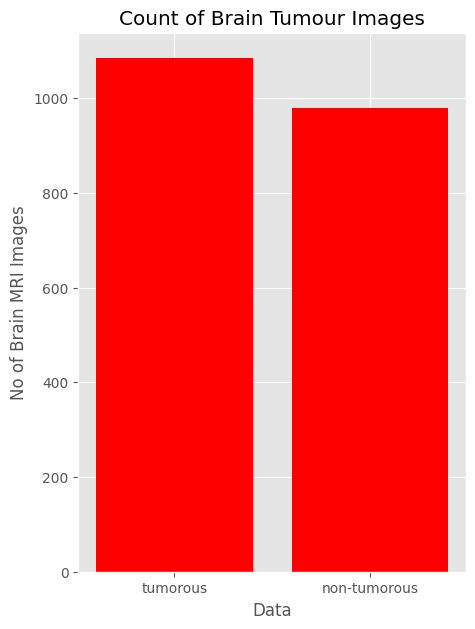

In [28]:
fig = plt.figure(figsize=(5,7))
plt.bar(typex , values , color = "red")
plt.xlabel("Data")
plt.ylabel("No of Brain MRI Images")
plt.title("Count of Brain Tumour Images")

In [29]:
# Data Preprocessing

In [30]:
#Convert to gray scale
#Gaussian Blur
#Thresholding
#Erode
#Dilate
#Find Contours

In [31]:
import imutils

def crop_brain_tumour(image , plot=False):
  gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray , (5,5) , 0)

  _,thresh = cv2.threshold(gray , 45 , 255 , cv2.THRESH_BINARY)
  cv2.erode(thresh , None , iterations = 2)
  cv2.dilate(thresh , None , iterations = 2)

  cnts = cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  c = max(cnts , key = cv2.contourArea)

  extLeft = tuple(c[c[:,:,0].argmin()][0])
  extRight = tuple(c[c[:,:,0].argmax()][0])
  extTop = tuple(c[c[:,:,1].argmin()][0])
  extBottom = tuple(c[c[:,:,1].argmax()][0])

  new_image = image[extTop[1]:extBottom[1] , extLeft[0]:extRight[0]]

  if plot:
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    plt.imshow(image)
    plt.tick_params(axis='both' , which='both' , labeltop=False , labelright=False , bottom=False , left=False , right = False , top=False , labelbottom=False , labelleft=False)
    plt.title("Original Image")


    ax = fig.add_subplot(1,2,2)
    plt.imshow(new_image)
    plt.tick_params(axis='both' , which='both' , labeltop=False , labelright=False , bottom=False , left=False , right = False , top=False , labelbottom=False , labelleft=False)
    plt.title("Cropped Image")
    plt.show()

  return new_image

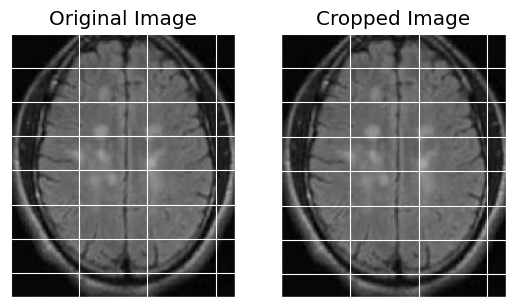

array([[[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       ...,

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]],

       [[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]]], dtype=uint8)
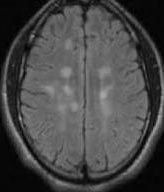

In [32]:
crop_brain_tumour(cv2.imread('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no/aug_N_10_0_1227.jpg'),True)

In [33]:
folder1 = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no/'
folder2 = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes/'

for filename in os.listdir(folder1):
  image = cv2.imread(folder1 + filename)
  image = crop_brain_tumour(image , plot = False)
  cv2.imwrite(folder1 + filename , image)

for filename in os.listdir(folder2):
  image = cv2.imread(folder2 + filename)
  image = crop_brain_tumour(image , plot = False)
  cv2.imwrite(folder2 + filename , image)

In [34]:
from sklearn.utils import shuffle

In [35]:
def load_data(dir_list ,image_size):
  x = []
  y = []
  image_width , image_height = image_size
  for directory in dir_list:
    for filename in os.listdir(directory):
      image = cv2.imread(directory + "/" + filename)
      image = crop_brain_tumour(image , plot = False)
      image = cv2.resize(image , (image_width ,image_height),interpolation=cv2.INTER_CUBIC)
      image = image/255.0
      x.append(image)
      if directory[-3:]=='yes':
        y.append(1)
      else:
        y.append(0)
  x = np.array(x)
  y = np.array(y)

  x,y = shuffle(x,y)
  print(f"no:of example is : {len(x)}")
  print(f"x shape is : {x.shape}")
  print(f"y shape is : {y.shape}")
  return x, y

In [36]:
aug_yes = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes'
aug_no = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no'
X , y = load_data([aug_yes , aug_no],(240 , 240))

no:of example is : 2064
x shape is : (2064, 240, 240, 3)
y shape is : (2064,)


In [ ]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
#plot

In [37]:
if not os.path.exists("tumorous_and_nontumorous"):
  os.makedirs("tumorous_and_nontumorous")


In [38]:
if not os.path.exists("tumorous_and_nontumorous/train"):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'train'))
if not os.path.exists("tumorous_and_nontumorous/test"):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'test'))
if not os.path.exists("tumorous_and_nontumorous/valid"):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'valid'))

In [39]:
if not os.path.isdir("tumorous_and_nontumorous/train/tumorous"):
  os.makedirs("tumorous_and_nontumorous/train/tumorous")
if not os.path.isdir(os.path.join("tumorous_and_nontumorous" , 'test' , 'tumorous')):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'test' , 'tumorous'))
if not os.path.isdir(os.path.join("tumorous_and_nontumorous" , 'valid' , 'tumorous')):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'valid' , 'tumorous'))

In [40]:
if not os.path.isdir("tumorous_and_nontumorous/train/nontumorous"):
  os.makedirs("tumorous_and_nontumorous/train/nontumorous")
if not os.path.isdir(os.path.join("tumorous_and_nontumorous" , 'test' , 'nontumorous')):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'test' , 'nontumorous'))
if not os.path.isdir(os.path.join("tumorous_and_nontumorous" , 'valid' , 'nontumorous')):
  os.makedirs(os.path.join("tumorous_and_nontumorous" , 'valid' , 'nontumorous'))

In [41]:
original_dataset_tumorours = aug_yes
original_dataset_nontumorours = aug_no

In [42]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes')
fnames = []
for i in range(0,759):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_tumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/train/tumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

# aug_yes = '/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes'


['aug_Y_25_0_6138.jpg', 'aug_Y_25_0_910.jpg', 'aug_Y_25_0_4032.jpg', 'aug_Y_25_0_9536.jpg', 'aug_Y_25_0_9647.jpg', 'aug_Y_25_0_1530.jpg', 'aug_Y_25_0_4861.jpg', 'aug_Y_26_0_3437.jpg', 'aug_Y_26_0_1597.jpg', 'aug_Y_26_0_1829.jpg', 'aug_Y_26_0_9320.jpg', 'aug_Y_26_0_3838.jpg', 'aug_Y_26_0_1876.jpg', 'aug_Y_26_0_7814.jpg', 'aug_Y_27_0_1649.jpg', 'aug_Y_27_0_436.jpg', 'aug_Y_27_0_1706.jpg', 'aug_Y_27_0_9512.jpg', 'aug_Y_27_0_9983.jpg', 'aug_Y_27_0_8708.jpg', 'aug_Y_28_0_433.jpg', 'aug_Y_28_0_2117.jpg', 'aug_Y_28_0_8700.jpg', 'aug_Y_28_0_8977.jpg', 'aug_Y_27_0_791.jpg', 'aug_Y_28_0_8961.jpg', 'aug_Y_28_0_2536.jpg', 'aug_Y_28_0_2279.jpg', 'aug_Y_29_0_8669.jpg', 'aug_Y_29_0_397.jpg', 'aug_Y_29_0_5826.jpg', 'aug_Y_29_0_3029.jpg', 'aug_Y_29_0_3080.jpg', 'aug_Y_29_0_1555.jpg', 'aug_Y_30_0_4057.jpg', 'aug_Y_30_0_7756.jpg', 'aug_Y_29_0_4599.jpg', 'aug_Y_30_0_60.jpg', 'aug_Y_30_0_7275.jpg', 'aug_Y_30_0_6850.jpg', 'aug_Y_30_0_2687.jpg', 'aug_Y_30_0_7695.jpg', 'aug_Y_31_0_5620.jpg', 'aug_Y_31_0_3606.

In [43]:
print(fnames)

['aug_Y_25_0_6138.jpg', 'aug_Y_25_0_910.jpg', 'aug_Y_25_0_4032.jpg', 'aug_Y_25_0_9536.jpg', 'aug_Y_25_0_9647.jpg', 'aug_Y_25_0_1530.jpg', 'aug_Y_25_0_4861.jpg', 'aug_Y_26_0_3437.jpg', 'aug_Y_26_0_1597.jpg', 'aug_Y_26_0_1829.jpg', 'aug_Y_26_0_9320.jpg', 'aug_Y_26_0_3838.jpg', 'aug_Y_26_0_1876.jpg', 'aug_Y_26_0_7814.jpg', 'aug_Y_27_0_1649.jpg', 'aug_Y_27_0_436.jpg', 'aug_Y_27_0_1706.jpg', 'aug_Y_27_0_9512.jpg', 'aug_Y_27_0_9983.jpg', 'aug_Y_27_0_8708.jpg', 'aug_Y_28_0_433.jpg', 'aug_Y_28_0_2117.jpg', 'aug_Y_28_0_8700.jpg', 'aug_Y_28_0_8977.jpg', 'aug_Y_27_0_791.jpg', 'aug_Y_28_0_8961.jpg', 'aug_Y_28_0_2536.jpg', 'aug_Y_28_0_2279.jpg', 'aug_Y_29_0_8669.jpg', 'aug_Y_29_0_397.jpg', 'aug_Y_29_0_5826.jpg', 'aug_Y_29_0_3029.jpg', 'aug_Y_29_0_3080.jpg', 'aug_Y_29_0_1555.jpg', 'aug_Y_30_0_4057.jpg', 'aug_Y_30_0_7756.jpg', 'aug_Y_29_0_4599.jpg', 'aug_Y_30_0_60.jpg', 'aug_Y_30_0_7275.jpg', 'aug_Y_30_0_6850.jpg', 'aug_Y_30_0_2687.jpg', 'aug_Y_30_0_7695.jpg', 'aug_Y_31_0_5620.jpg', 'aug_Y_31_0_3606.

In [44]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes')
fnames = []
for i in range(759,922):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_tumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/test/tumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

['aug_Y_133_0_6689.jpg', 'aug_Y_133_0_6638.jpg', 'aug_Y_134_0_9200.jpg', 'aug_Y_134_0_4013.jpg', 'aug_Y_133_0_8342.jpg', 'aug_Y_134_0_7874.jpg', 'aug_Y_133_0_4976.jpg', 'aug_Y_134_0_519.jpg', 'aug_Y_134_0_9412.jpg', 'aug_Y_134_0_2402.jpg', 'aug_Y_135_0_6800.jpg', 'aug_Y_135_0_5024.jpg', 'aug_Y_135_0_5336.jpg', 'aug_Y_135_0_2906.jpg', 'aug_Y_135_0_9835.jpg', 'aug_Y_135_0_1489.jpg', 'aug_Y_135_0_3714.jpg', 'aug_Y_136_0_780.jpg', 'aug_Y_136_0_6890.jpg', 'aug_Y_136_0_7920.jpg', 'aug_Y_136_0_8260.jpg', 'aug_Y_136_0_5395.jpg', 'aug_Y_136_0_5361.jpg', 'aug_Y_137_0_5012.jpg', 'aug_Y_137_0_7644.jpg', 'aug_Y_136_0_6968.jpg', 'aug_Y_137_0_1443.jpg', 'aug_Y_137_0_3361.jpg', 'aug_Y_137_0_6818.jpg', 'aug_Y_137_0_5163.jpg', 'aug_Y_137_0_659.jpg', 'aug_Y_138_0_9289.jpg', 'aug_Y_138_0_86.jpg', 'aug_Y_138_0_9851.jpg', 'aug_Y_138_0_8524.jpg', 'aug_Y_138_0_1199.jpg', 'aug_Y_138_0_467.jpg', 'aug_Y_138_0_2504.jpg', 'aug_Y_139_0_3088.jpg', 'aug_Y_139_0_4256.jpg', 'aug_Y_139_0_8353.jpg', 'aug_Y_139_0_7425.jpg

In [45]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/yes')
fnames = []
for i in range(922,1084):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_tumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/valid/tumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

['aug_Y_1_0_4066.jpg', 'aug_Y_2_0_7814.jpg', 'aug_Y_2_0_4235.jpg', 'aug_Y_2_0_3891.jpg', 'aug_Y_2_0_9920.jpg', 'aug_Y_2_0_5871.jpg', 'aug_Y_2_0_490.jpg', 'aug_Y_2_0_3816.jpg', 'aug_Y_3_0_2423.jpg', 'aug_Y_3_0_2901.jpg', 'aug_Y_3_0_36.jpg', 'aug_Y_3_0_7449.jpg', 'aug_Y_3_0_5002.jpg', 'aug_Y_4_0_6174.jpg', 'aug_Y_3_0_7792.jpg', 'aug_Y_4_0_530.jpg', 'aug_Y_4_0_8664.jpg', 'aug_Y_4_0_905.jpg', 'aug_Y_3_0_9307.jpg', 'aug_Y_4_0_9525.jpg', 'aug_Y_4_0_6609.jpg', 'aug_Y_4_0_3763.jpg', 'aug_Y_5_0_8621.jpg', 'aug_Y_5_0_4235.jpg', 'aug_Y_5_0_1558.jpg', 'aug_Y_5_0_7019.jpg', 'aug_Y_5_0_6080.jpg', 'aug_Y_5_0_5505.jpg', 'aug_Y_5_0_6406.jpg', 'aug_Y_6_0_2151.jpg', 'aug_Y_6_0_2760.jpg', 'aug_Y_6_0_5648.jpg', 'aug_Y_6_0_3769.jpg', 'aug_Y_6_0_5670.jpg', 'aug_Y_6_0_2090.jpg', 'aug_Y_6_0_2960.jpg', 'aug_Y_7_0_1712.jpg', 'aug_Y_7_0_3729.jpg', 'aug_Y_7_0_5265.jpg', 'aug_Y_7_0_9533.jpg', 'aug_Y_7_0_462.jpg', 'aug_Y_7_0_3741.jpg', 'aug_Y_7_0_322.jpg', 'aug_Y_8_0_222.jpg', 'aug_Y_8_0_6107.jpg', 'aug_Y_8_0_3613.j

In [ ]:
# import os
# import shutil

# def delete_folder_contents(folder_path):
#     # Check if the folder exists
#     if not os.path.exists(folder_path):
#         print(f"The folder {folder_path} does not exist.")
#         return

#     # Iterate over the files and directories in the specified folder
#     for filename in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, filename)

#         try:
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)  # Remove the file or link
#                 print(f"File {file_path} deleted.")
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)  # Remove the directory and its contents
#                 print(f"Directory {file_path} deleted.")
#         except Exception as e:
#             print(f"Failed to delete {file_path}. Reason: {e}")

# # Define the path to the folder whose contents you want to delete
# folder_path = '/content/tumorous_and_nontumorous/train/nontumorous'

# # Delete the folder contents
# delete_folder_contents(folder_path)


In [46]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no')
fnames = []
for i in range(0,686):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_nontumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/train/nontumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

['aug_N_1_0_8374.jpg', 'aug_N_1_0_9556.jpg', 'aug_N_1_0_3420.jpg', 'aug_N_1_0_54.jpg', 'aug_N_1_0_1320.jpg', 'aug_N_1_0_9847.jpg', 'aug_N_1_0_6205.jpg', 'aug_N_1_0_4353.jpg', 'aug_N_1_0_9227.jpg', 'aug_N_1_0_4274.jpg', 'aug_N_2_0_3970.jpg', 'aug_N_2_0_9265.jpg', 'aug_N_2_0_7665.jpg', 'aug_N_2_0_5179.jpg', 'aug_N_2_0_7401.jpg', 'aug_N_2_0_6020.jpg', 'aug_N_2_0_5735.jpg', 'aug_N_2_0_3378.jpg', 'aug_N_2_0_5721.jpg', 'aug_N_2_0_5480.jpg', 'aug_N_3_0_3154.jpg', 'aug_N_3_0_7326.jpg', 'aug_N_3_0_2922.jpg', 'aug_N_3_0_1625.jpg', 'aug_N_3_0_6743.jpg', 'aug_N_3_0_4267.jpg', 'aug_N_3_0_9702.jpg', 'aug_N_3_0_9737.jpg', 'aug_N_3_0_6203.jpg', 'aug_N_3_0_2933.jpg', 'aug_N_4_0_806.jpg', 'aug_N_4_0_778.jpg', 'aug_N_4_0_8659.jpg', 'aug_N_4_0_3593.jpg', 'aug_N_4_0_6586.jpg', 'aug_N_4_0_7446.jpg', 'aug_N_4_0_2253.jpg', 'aug_N_4_0_3969.jpg', 'aug_N_4_0_1447.jpg', 'aug_N_4_0_3232.jpg', 'aug_N_5_0_603.jpg', 'aug_N_5_0_6637.jpg', 'aug_N_5_0_769.jpg', 'aug_N_5_0_1990.jpg', 'aug_N_5_0_88.jpg', 'aug_N_5_0_5317.j

In [47]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no')
fnames = []
for i in range(686,833):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_nontumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/test/nontumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

['aug_N_69_0_4545.jpg', 'aug_N_69_0_5359.jpg', 'aug_N_70_0_6066.jpg', 'aug_N_69_0_588.jpg', 'aug_N_69_0_8183.jpg', 'aug_N_70_0_346.jpg', 'aug_N_70_0_6005.jpg', 'aug_N_70_0_6205.jpg', 'aug_N_70_0_6880.jpg', 'aug_N_70_0_9109.jpg', 'aug_N_70_0_8315.jpg', 'aug_N_70_0_4723.jpg', 'aug_N_70_0_3090.jpg', 'aug_N_70_0_5625.jpg', 'aug_N_71_0_5998.jpg', 'aug_N_71_0_5399.jpg', 'aug_N_71_0_2297.jpg', 'aug_N_71_0_1947.jpg', 'aug_N_71_0_8350.jpg', 'aug_N_71_0_5802.jpg', 'aug_N_71_0_3094.jpg', 'aug_N_71_0_4228.jpg', 'aug_N_72_0_1339.jpg', 'aug_N_71_0_9846.jpg', 'aug_N_71_0_9451.jpg', 'aug_N_72_0_89.jpg', 'aug_N_72_0_4437.jpg', 'aug_N_72_0_9295.jpg', 'aug_N_72_0_8895.jpg', 'aug_N_72_0_2667.jpg', 'aug_N_72_0_75.jpg', 'aug_N_72_0_8308.jpg', 'aug_N_72_0_4387.jpg', 'aug_N_72_0_3605.jpg', 'aug_N_73_0_1223.jpg', 'aug_N_73_0_9488.jpg', 'aug_N_73_0_4167.jpg', 'aug_N_73_0_8896.jpg', 'aug_N_73_0_5913.jpg', 'aug_N_73_0_9860.jpg', 'aug_N_73_0_6421.jpg', 'aug_N_73_0_7795.jpg', 'aug_N_73_0_1322.jpg', 'aug_N_74_0_4965

In [48]:
files = os.listdir('/content/drive/MyDrive/Vit/brain_tumor_dataset/aug/no')
fnames = []
for i in range(833,979):
  fnames.append(files[i])
for fn in fnames:
  src = os.path.join(original_dataset_nontumorours,fn)
  dst = os.path.join("tumorous_and_nontumorous/valid/nontumorous",fn)
  shutil.copyfile(src,dst)
print(fnames)

['aug_N_84_0_1412.jpg', 'aug_N_84_0_1048.jpg', 'aug_N_84_0_6042.jpg', 'aug_N_84_0_6498.jpg', 'aug_N_84_0_9838.jpg', 'aug_N_84_0_9513.jpg', 'aug_N_85_0_1317.jpg', 'aug_N_85_0_8316.jpg', 'aug_N_85_0_2928.jpg', 'aug_N_84_0_5064.jpg', 'aug_N_85_0_6372.jpg', 'aug_N_85_0_7433.jpg', 'aug_N_85_0_9128.jpg', 'aug_N_85_0_6206.jpg', 'aug_N_85_0_3742.jpg', 'aug_N_85_0_9481.jpg', 'aug_N_85_0_2774.jpg', 'aug_N_86_0_2582.jpg', 'aug_N_86_0_5708.jpg', 'aug_N_86_0_3041.jpg', 'aug_N_86_0_8498.jpg', 'aug_N_86_0_1633.jpg', 'aug_N_86_0_2181.jpg', 'aug_N_86_0_1565.jpg', 'aug_N_86_0_6129.jpg', 'aug_N_86_0_3206.jpg', 'aug_N_86_0_8181.jpg', 'aug_N_87_0_8905.jpg', 'aug_N_87_0_7298.jpg', 'aug_N_87_0_8324.jpg', 'aug_N_87_0_8.jpg', 'aug_N_87_0_438.jpg', 'aug_N_87_0_7498.jpg', 'aug_N_87_0_8286.jpg', 'aug_N_87_0_4976.jpg', 'aug_N_87_0_7060.jpg', 'aug_N_87_0_3699.jpg', 'aug_N_88_0_7677.jpg', 'aug_N_88_0_8180.jpg', 'aug_N_88_0_4176.jpg', 'aug_N_88_0_4634.jpg', 'aug_N_88_0_1719.jpg', 'aug_N_88_0_7197.jpg', 'aug_N_88_0_43

In [49]:
# model building

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255,
                   horizontal_flip=0.4,
                   vertical_flip=0.4,
                   rotation_range = 40,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   width_shift_range = 0.4,
                   height_shift_range = 0.4,
                   fill_mode = 'nearest'
                   )
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [51]:
import os
import shutil

base_dir = '/content/tumorous_and_nontumorous/train/'

for root, dirs, files in os.walk(base_dir):
    if '.ipynb_checkpoints' in dirs:
        shutil.rmtree(os.path.join(root, '.ipynb_checkpoints'))
        print(f"Removed: {os.path.join(root, '.ipynb_checkpoints')}")


In [52]:
train_generator = train_datagen.flow_from_directory('/content/tumorous_and_nontumorous/train/',shuffle=True,seed = 42 ,target_size=(240,240),batch_size=32,class_mode='categorical' , color_mode='rgb')


Found 1445 images belonging to 2 classes.


In [53]:
train_generator

In [54]:
test_generator = test_datagen.flow_from_directory('/content/tumorous_and_nontumorous/test/',shuffle=True,seed = 42 ,target_size=(240,240),batch_size=32,class_mode='categorical' , color_mode='rgb')

Found 310 images belonging to 2 classes.


In [55]:
valid_generator = valid_datagen.flow_from_directory('/content/tumorous_and_nontumorous/valid/',shuffle=True,seed = 42 ,target_size=(240,240),batch_size=32,class_mode='categorical' , color_mode='rgb')

Found 308 images belonging to 2 classes.


In [56]:
train_generator.class_indices

{'nontumorous': 0, 'tumorous': 1}

In [57]:
class_labels = train_generator.class_indices
class_name = {value : key for (key,value) in class_labels.items()}

In [58]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [59]:
base_model = VGG19(input_shape = (240,240,3), include_top = False, weights = 'imagenet')
for layers in base_model.layers:
  layers.trainable = False
x = base_model.output
flat = Flatten()(x)

class1 = Dense(4608 , activation = 'relu')(flat)
dropout = Dropout(0.2)(class1)
class2 = Dense(1152 , activation = 'relu')(dropout)
output = Dense(2 , activation = 'softmax')(class2)
model = Model(inputs = base_model.input , outputs = output)

80134624/80134624 [==============================] - 4s 0us/step


In [60]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

In [62]:
#callbacks

filepath = '/content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5'
es = EarlyStopping(monitor = 'val_loss' , patience = 4 , verbose = 1 , restore_best_weights = True,mode = 'min')
cp = ModelCheckpoint(filepath , monitor = 'val_loss' , verbose = 1 , save_best_only = True , mode = 'min',save_weights_only = False,save_freq = 'epoch')
lrr = ReduceLROnPlateau(monitor = 'val_accuracy' , factor = 0.5 , patience = 3 , verbose = 1 , mode = 'min',min_lr=0.0001)

In [63]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.01 * epoch)

sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(train_generator,validation_data=valid_generator,epochs=10,callbacks=[es,cp,lrr],steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.5085
Epoch 1: val_loss improved from inf to 0.74781, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 83s 8s/step - loss: 0.8013 - accuracy: 0.5085 - val_loss: 0.7478 - val_accuracy: 0.4805 - lr: 1.0000e-04
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.5688
Epoch 2: val_loss improved from 0.74781 to 0.67633, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5
10/10 [==============================] - 21s 2s/step - loss: 0.6955 - accuracy: 0.5688 - val_loss: 0.6763 - val_accuracy: 0.5292 - lr: 1.0000e-04
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.5219
Epoch 3: val_loss improved from 0.67633 to 0.65407, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5
10/10 [==============================] - 23s 2s/step - loss: 0.7316 - accuracy: 0.5219 - val_loss: 0.6541 - val_accuracy: 0.6299 - lr: 1.0000e-04
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.7238 - accuracy: 0.5427
Epoch 4: val_loss did not improv

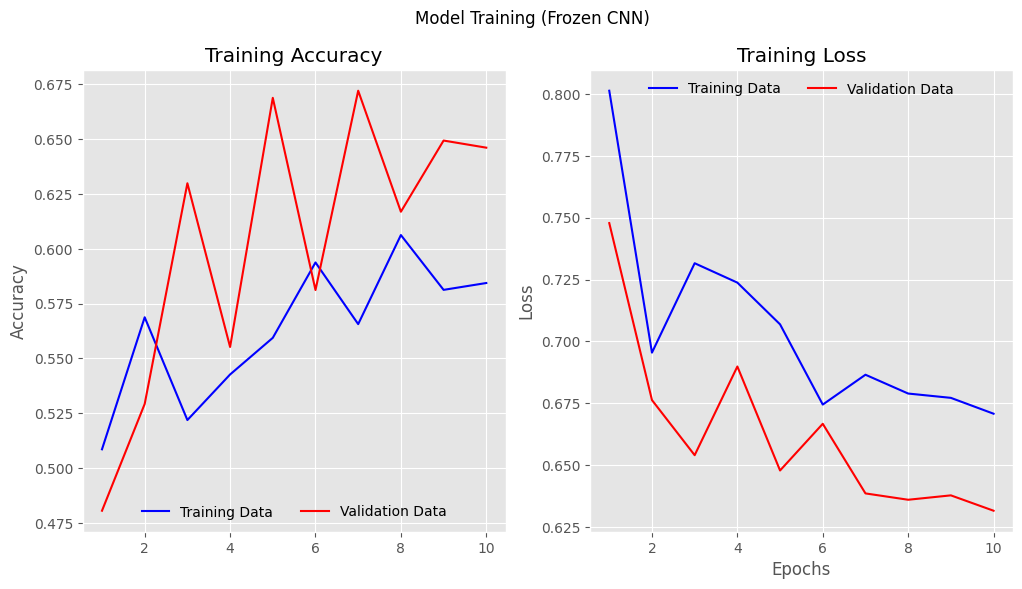

In [65]:
fig , (ax1,ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,6))
fig.suptitle("Model Training (Frozen CNN)",fontsize = 12)
max_epoch = len(history.history['accuracy'])+1
epochs_list = list(range(1,max_epoch))
ax1.plot(epochs_list,history.history['accuracy'],color = 'b' , linestyle = '-' , label = "Training Data")
ax1.plot(epochs_list,history.history['val_accuracy'],color = 'r' , linestyle = '-' , label = "Validation Data")
ax1.set_title("Training Accuracy")
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(frameon = False,loc = 'lower center' , ncol = 2)

ax2.plot(epochs_list,history.history['loss'],color = 'b' , linestyle = '-' , label = "Training Data")
ax2.plot(epochs_list,history.history['val_loss'],color = 'r' , linestyle = '-' , label = "Validation Data")
ax2.set_title("Training Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(frameon = False,loc = 'upper center' , ncol = 2)
plt.savefig('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_training.png',dpi = 100 , bbox_inches = 'tight')
plt.show()

In [67]:
model.save_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights.h5',overwrite=True)

In [70]:
model.load_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights.h5')
vgg_val_eval = model.evaluate(valid_generator)
vgg_test_eval = model.evaluate(test_generator)

10/10 [==============================] - 2s 180ms/step - loss: 0.6006 - accuracy: 0.7000


In [71]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict(test_generator,nb_samples,verbose = 1)

10/10 [==============================] - 2s 181ms/step


In [73]:
y_pred = np.argmax(predict,axis=1)

In [74]:
# Incremental unfreezing and finetuning

In [77]:
base_model = VGG19(include_top = False , input_shape = (240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

In [78]:
base_model_layer_names

['input_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [79]:
x = base_model.output
flat = Flatten()(x)

class1 = Dense(4608 , activation = 'relu')(flat)
dropout = Dropout(0.2)(class1)
class2 = Dense(1152 , activation = 'relu')(dropout)
output = Dense(2 , activation = 'softmax')(class2)
model_02 = Model(inputs = base_model.inputs , outputs = output)
model_02.load_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights.h5')
set_trainable = False;
for layer in base_model.layers:
  if layer.name in ['block5_conv4','block5_conv3','block5_conv2','block5_conv1']:
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
print(model_02.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [84]:
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

model_02.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

history_02 = model_02.fit(train_generator,validation_data=valid_generator,epochs=25,callbacks=[es,cp,lrr],steps_per_epoch=10)

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.6531
Epoch 1: val_loss did not improve from 0.58521
10/10 [==============================] - 13s 1s/step - loss: 0.6225 - accuracy: 0.6531 - val_loss: 0.6123 - val_accuracy: 0.6591 - lr: 1.0000e-04
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 0.6231 - accuracy: 0.6250
Epoch 2: val_loss improved from 0.58521 to 0.57449, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 35s 4s/step - loss: 0.6231 - accuracy: 0.6250 - val_loss: 0.5745 - val_accuracy: 0.6818 - lr: 1.0000e-04
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 0.6147 - accuracy: 0.6416
Epoch 3: val_loss improved from 0.57449 to 0.57418, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5
10/10 [==============================] - 23s 2s/step - loss: 0.6147 - accuracy: 0.6416 - val_loss: 0.5742 - val_accuracy: 0.6786 - lr: 1.0000e-04
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.6938
Epoch 4: val_loss did not improve from 0.57418
10/10 [==============================] - 8s 744ms/step - loss: 0.5885 - accuracy: 0.6938 - val_loss: 0.6131 - val_accuracy: 0.6558 - lr: 1.0000e-04
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.6594
Epoch 5: val_loss improved from 0.57418 to 0.56818, saving model to /content/drive/MyDrive/Vit/brain_tumor_

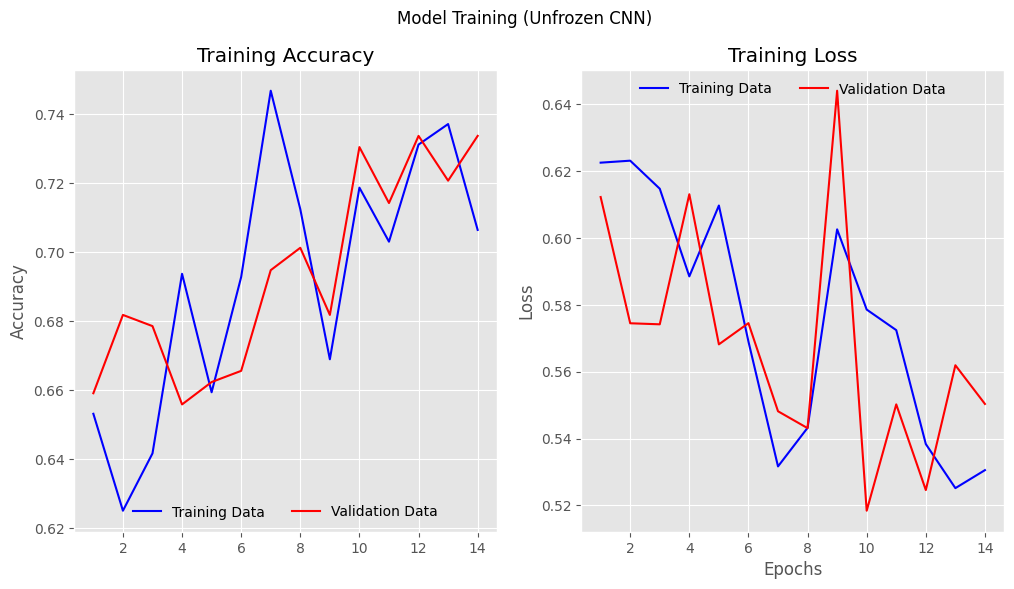

In [85]:
fig , (ax1,ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,6))
fig.suptitle("Model Training (Unfrozen CNN)",fontsize = 12)
max_epoch = len(history_02.history['accuracy'])+1
epochs_list = list(range(1,max_epoch))
ax1.plot(epochs_list,history_02.history['accuracy'],color = 'b' , linestyle = '-' , label = "Training Data")
ax1.plot(epochs_list,history_02.history['val_accuracy'],color = 'r' , linestyle = '-' , label = "Validation Data")
ax1.set_title("Training Accuracy")
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(frameon = False,loc = 'lower center' , ncol = 2)

ax2.plot(epochs_list,history_02.history['loss'],color = 'b' , linestyle = '-' , label = "Training Data")
ax2.plot(epochs_list,history_02.history['val_loss'],color = 'r' , linestyle = '-' , label = "Validation Data")
ax2.set_title("Training Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(frameon = False,loc = 'upper center' , ncol = 2)
plt.savefig('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_training_02.png',dpi = 100 , bbox_inches = 'tight')
plt.show()

In [86]:
model_02.save_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights_02.h5',overwrite=True)

In [87]:
model_02.load_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights_02.h5')
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)


10/10 [==============================] - 2s 185ms/step - loss: 0.4741 - accuracy: 0.7323


In [91]:
#unfreezing the entire network
base_model = VGG19(include_top = False , input_shape = (240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

x = base_model.output
flat = Flatten()(x)

class1 = Dense(4608 , activation = 'relu')(flat)
dropout = Dropout(0.2)(class1)
class2 = Dense(1152 , activation = 'relu')(dropout)
output = Dense(2 , activation = 'softmax')(class2)
model_03 = Model(inputs = base_model.inputs , outputs = output)
model_03.load_weights('/content/drive/MyDrive/Vit/brain_tumor_dataset/model_weights_02.h5')
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)

model_03.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print(model_03.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [92]:
history_03 = model_03.fit(train_generator,validation_data=valid_generator,epochs=25,callbacks=[es,cp,lrr],steps_per_epoch=20)

Epoch 1/25
20/20 [==============================] - ETA: 0s - loss: 0.5505 - accuracy: 0.7031
Epoch 1: val_loss improved from 0.51841 to 0.46157, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 73s 3s/step - loss: 0.5505 - accuracy: 0.7031 - val_loss: 0.4616 - val_accuracy: 0.7597 - lr: 1.0000e-04
Epoch 2/25
20/20 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7015
Epoch 2: val_loss improved from 0.46157 to 0.43575, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5
20/20 [==============================] - 46s 2s/step - loss: 0.5876 - accuracy: 0.7015 - val_loss: 0.4357 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 3/25
20/20 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7651
Epoch 3: val_loss improved from 0.43575 to 0.40668, saving model to /content/drive/MyDrive/Vit/brain_tumor_dataset/model.h5
20/20 [==============================] - 36s 2s/step - loss: 0.4918 - accuracy: 0.7651 - val_loss: 0.4067 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 4/25
20/20 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.7391
Epoch 4: val_loss improved from 